#import

In [ ]:
### librerie ###
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score,f1_score,ConfusionMatrixDisplay,confusion_matrix
from keras.utils import to_categorical

import sklearn.metrics as metrics

import cv2

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as p
import seaborn as sns

import time
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras import backend as K

In [ ]:
! pip install install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Step 1: Import necessary libraries
import os
import pandas as pd

# Step 2: Define the file name
file_name = "dataset_2.csv"

# Step 3: Provide the full path to the file
file_path = os.path.join("/content/drive/MyDrive/", file_name)

# Step 4: Print the full file path (optional)
print("Full File Path:", file_path)

# Step 5: Read the CSV file into a DataFrame
df = pd.read_csv(file_path, delimiter = ';')

# Step 6: Display the DataFrame
print(df)




Full File Path: /content/drive/MyDrive/dataset_2.csv
       Unnamed: 0                                     extracted_text  \
0               1  copd coronary artery diseaseatypical angina la...   
1               3   cervical spondylosis calcification posterior ...   
2               4                                       brain lesion   
3               5                                          pneumonia   
4               6                            left sided brain lesion   
...           ...                                                ...   
25113       37764  left subdural hematoma multiple intraparenchym...   
25114       37766                               lithium intoxication   
25115       37769                            right subdural hematoma   
25116       37770                                sdh jaw dislocation   
25117       37771                              left acoustic neuroma   

                                           ICD9_CATEGORY  
0                     D

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25118 entries, 0 to 25117
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      25118 non-null  int64 
 1   extracted_text  25082 non-null  object
 2   ICD9_CATEGORY   25118 non-null  object
dtypes: int64(1), object(2)
memory usage: 588.8+ KB


In [ ]:
# Display the first few rows of the DataFrame
df.head()


,SUBJECT_ID,ICD9_extracted_text,ICD9_XVI,ICD9_XVIII,ICD9_X,ICD9_IX,ICD9_VII,ICD9_IV,ICD9_VIII,ICD9_XVII,ICD9_V,ICD9_III,ICD9_VI,ICD9_XIII,ICD9_II,ICD9_I,ICD9_XII,ICD9_XIV,ICD9_XV,ICD9_XI
0,17,sp emergent pericardial window sternotomy card...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,sp fall dens fracture,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,acute coronary syndrome congestive heart failu...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,23,sp cabgx limalad svgdiag svgom svgpda pmh cad ...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24,inferior mi hypertension hypercholesterolemia,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

df = df.drop(columns=['Unnamed: 0'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25118 entries, 0 to 25117
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   extracted_text  25082 non-null  object
 1   ICD9_CATEGORY   25118 non-null  object
dtypes: object(2)
memory usage: 392.6+ KB
None


In [ ]:
len(df.extracted_text.iloc[0])

# Assuming df is your DataFrame with 'extracted_text' column
text_lengths = df['extracted_text'].dropna().apply(len)

# Descriptive statistics
stats = text_lengths.describe()

# Individual statistics
min_length = stats['min']
max_length = stats['max']
mean_length = stats['mean']
first_quartile = stats['25%']
third_quartile = stats['75%']

# Print the results
print(f"Minimum Length: {min_length}")
print(f"Maximum Length: {max_length}")
print(f"Mean Length: {mean_length}")
print(f"1st Quartile: {first_quartile}")
print(f"3rd Quartile: {third_quartile}")



Minimum Length: 1.0
Maximum Length: 4496.0
Mean Length: 104.94940594848896
1st Quartile: 35.0
3rd Quartile: 134.0


In [ ]:
# Assuming df is your DataFrame
nan_rows = df[df['extracted_text'].isna()]

# Display rows with NaN values in 'extracted_text'
print(nan_rows)

# Assuming df is your DataFrame
df_cleaned = df.dropna(subset=['extracted_text'])

 #df_cleaned now contains rows without NaN values in the 'extracted_text' column




df_cleaned = df_cleaned.dropna().reset_index(drop=True)



      extracted_text                                      ICD9_CATEGORY
1715             NaN  Endocrine, nutritional and metabolic diseases,...
2473             NaN                 Diseases of the circulatory system
2715             NaN                  Infectious and parasitic diseases
3000             NaN                 Diseases of the circulatory system
3955             NaN                 Diseases of the respiratory system
4272             NaN                 Diseases of the respiratory system
6221             NaN                  Infectious and parasitic diseases
6225             NaN                  Infectious and parasitic diseases
6576             NaN                  Infectious and parasitic diseases
6834             NaN               Diseases of the genitourinary system
7153             NaN                   Diseases of the digestive system
9855             NaN                   Diseases of the digestive system
10055            NaN                 Diseases of the respiratory

In [ ]:
# Check for duplicate indices
duplicated_indices = df_cleaned[df_cleaned.index.duplicated(keep=False)]
print("Duplicate Indices:")
print(duplicated_indices)

# Count the occurrences of each index
index_counts = df_cleaned.index.value_counts()
print("\nIndex Counts:")
print(index_counts)


Duplicate Indices:
Empty DataFrame
Columns: [extracted_text, ICD9_CATEGORY]
Index: []

Index Counts:
0        1
17579    1
17589    1
17588    1
17587    1
        ..
8788     1
8787     1
8786     1
8785     1
26373    1
Length: 26374, dtype: int64


#  train test split


In [ ]:
df_cleaned.ICD9_CATEGORY.value_counts()

Diseases of the circulatory system                                       6178
Diseases of the respiratory system                                       3075
Injury and poisoning                                                     2946
Endocrine, nutritional and metabolic diseases, and immunity disorders    2017
Diseases of the genitourinary system                                     1894
Diseases of the digestive system                                         1468
Symptoms, signs, and ill-defined conditions                              1087
external causes of injury and supplemental classification                1087
Diseases of the nervous system and sense organs                          1079
Diseases of the blood and blood-forming organs                            917
Neoplasms                                                                 866
Mental disorders                                                          790
Infectious and parasitic diseases                               

In [ ]:
# Map categories to numerical values
target = {
    'Diseases of the circulatory system': 7,
    'Diseases of the respiratory system': 8,
    'Injury and poisoning': 17,
    'Diseases of the genitourinary system': 10,
    'Diseases of the digestive system': 9,
    'Diseases of the nervous system and sense organs': 6,
    'Symptoms, signs, and ill-defined conditions': 16,
    'Endocrine, nutritional and metabolic diseases, and immunity disorders': 3,
    'Infectious and parasitic diseases': 1,
    'Diseases of the blood and blood-forming organs': 4,
    'Neoplasms': 2,
    'external causes of injury and supplemental classification': 18,
    'Mental disorders': 5,
    'Diseases of the skin and subcutaneous tissue': 12,
    'Congenital anomalies': 14,
    'Diseases of the musculoskeletal system and connective tissue': 13,
    'Complications of pregnancy, childbirth, and the puerperium': 11,
    'Certain conditions originating in the perinatal period': 15
}

df_cleaned['category_num'] = df_cleaned['ICD9_CATEGORY'].map(target)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned.extracted_text,
    df_cleaned.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=42,
    )


In [ ]:
import numpy as np


print("Numero di esempi nel train set: %d" % len(X_train))
print("Numero di esempi nel test set: %d" % len(X_test))
print("Numero di classi:",len(np.unique(y_train)))

max_rev=max(X_train,key=len)
print("Lunghezza massima:"+str(len(max_rev)))



Numero di esempi nel train set: 20065
Numero di esempi nel test set: 5017
Numero di classi: 18
Lunghezza massima:4496


In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

###### NB ########

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.38      0.02      0.04       127
           2       0.39      0.30      0.34       170
           3       0.22      0.07      0.10       384
           4       0.24      0.05      0.09       182
           5       0.28      0.11      0.16       171
           6       0.23      0.27      0.25       199
           7       0.42      0.68      0.52      1255
           8       0.28      0.37      0.32       625
           9       0.26      0.38      0.31       276
          10       0.20      0.17      0.18       379
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        61
          13       0.00      0.00      0.00        51
          14       0.00      0.00      0.00        36
          15       1.00      0.50      0.67         2
          16       0.07      0.01      0.02       208
          17       0.34      0.39      0.36       595
          18       0.06    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print([:1])

12065    rash hypotension
Name: extracted_text, dtype: object


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[870, 143,  34,  86,  47,  66,   2,   1,   3,   0,  10,   0,   0,
          0,   0,   0,   0,   0],
       [219, 424,  64,  44,  48,  55,   3,   6,   3,   3,   9,   0,   7,
          0,   1,   0,   0,   0],
       [159,  52, 222,  13,  29,  14,   3,   2,   1,   1,   5,   0,   3,
          0,   0,   0,   0,   0],
       [151, 106,  22, 138,  51,  15,   4,   4,   4,   2,   4,   0,   0,
          0,   0,   0,   0,   0],
       [ 45,  49,  16,  25, 155,   2,   3,   1,   1,   2,   4,   0,   3,
          0,   0,   0,   0,   0],
       [ 39,  58,  28,  20,   9, 144,   1,   2,   2,   1,   7,   0,   0,
          0,   0,   0,   0,   0],
       [ 56,  62,  18,  27,  26,  23,   5,   2,   6,   0,   3,   0,   3,
          0,   1,   0,   0,   0],
       [ 81,  45,  10,  25,  10,  20,   1,  12,   1,   0,   2,   0,   8,
          0,   0,   0,   0,   0],
       [ 30,  60,   9,  30,  32,   2,   3,   1,  10,   0,   2,   0,   6,
          0,   0,   0,   0,   0],
       [ 44,  28,  19,   7,  19,   2,

Text(95.72222222222221, 0.5, 'Truth')

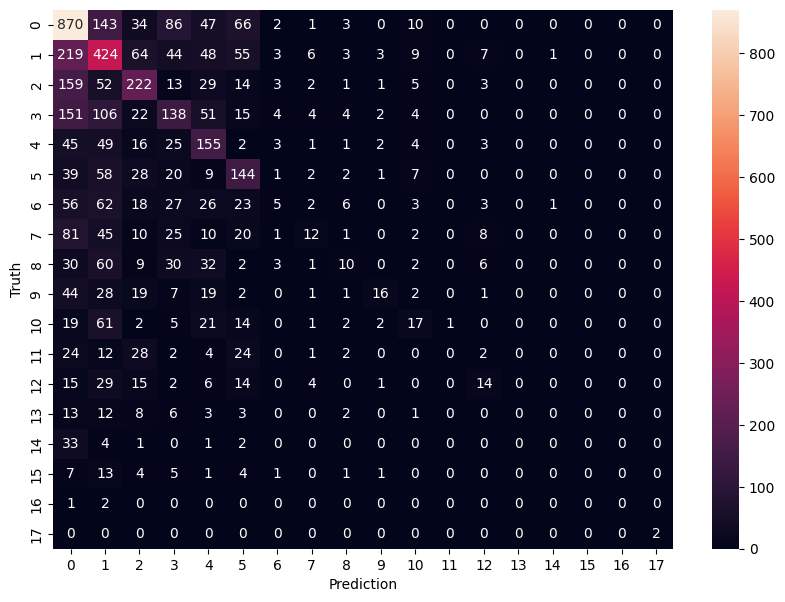

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')


In [ ]:
from sklearn.naive_bayes import MultinomialNB


##### TF IDF ###### E NB

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00       145
           3       0.50      0.00      0.01       215
           4       0.00      0.00      0.00       140
           5       0.00      0.00      0.00       100
           6       0.46      0.18      0.26       311
           7       0.36      0.88      0.51      1262
           8       0.33      0.45      0.38       886
           9       0.45      0.20      0.27       306
          10       0.38      0.07      0.12       501
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00        41
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00       232
          17       0.54      0.42      0.47       504
          18       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

##### TF IDF ###### E RF

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.29      0.08      0.13       185
           2       0.27      0.17      0.21       145
           3       0.21      0.07      0.10       215
           4       0.42      0.24      0.31       140
           5       0.31      0.17      0.22       100
           6       0.36      0.36      0.36       311
           7       0.44      0.76      0.56      1262
           8       0.43      0.46      0.45       886
           9       0.37      0.38      0.38       306
          10       0.30      0.20      0.24       501
          11       0.00      0.00      0.00         3
          12       0.43      0.06      0.11        48
          13       0.33      0.08      0.13        37
          14       0.00      0.00      0.00        41
          15       1.00      1.00      1.00         2
          16       0.20      0.07      0.11       232
          17       0.52      0.41      0.46       504
          18       0.14    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Tokenization
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1





In [ ]:
# Padding
from keras.preprocessing.sequence import pad_sequences

maxlen = 150


X_train_padded = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test, padding='post', maxlen=maxlen)




In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)



 #Convert integer labels to one-hot encoding
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

#rete

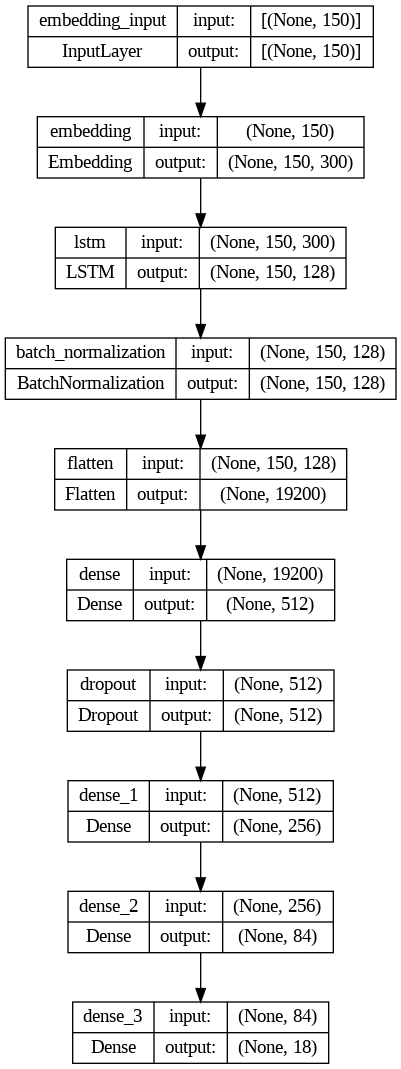

In [ ]:
#avazata

from keras.backend import clear_session
from keras.utils import plot_model
from keras.layers import Embedding, Flatten, Dense, Dropout, LSTM, BatchNormalization

clear_session()

from keras import regularizers


l2_reg=regularizers.L2(0.001)
embedding_dim = 300

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(128, return_sequences=True))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu',kernel_regularizer=l2_reg))
model.add(layers.Dense(18, activation='softmax'))

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

keras.utils.plot_model(model, "model.png", show_shapes=True)#ankdir="LR")


In [ ]:
import numpy as np
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix

class ClasswiseAccuracy(Callback):
    def __init__(self, validation_data):
        super(ClasswiseAccuracy, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        X_test_padded, y_test_cat = self.validation_data
        predictions = np.argmax(self.model.predict(X_test_padded), axis=1)
        y_val = np.argmax(y_test_cat, axis=1)  # Assuming y_val is one-hot encoded
        cm = confusion_matrix(y_val, predictions)
        classwise_accuracy = cm.diagonal() / cm.sum(axis=1)
        for i, acc in enumerate(classwise_accuracy):
            print(f"Accuracy for class {i}: {acc}")

# Assuming test_data and test_labels are your test dataset
global_accuracy = model.evaluate(X_test_padded, y_test_cat, verbose=0)
# Here you can reuse the logic from the ClasswiseAccuracy callback to calculate class-wise accuracy for the test set



In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

classwise_accuracy_callback = ClasswiseAccuracy(validation_data=(X_test_padded, y_test_cat))

# Callbacks included in the model's fit allow you to perform specific actions during training.
keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=0.001),

    classwise_accuracy_callback

]


history = model.fit(X_train_padded, y_train_cat, epochs=100, batch_size=256, verbose=1,
                    validation_data=(X_test_padded, y_test_cat), callbacks=keras_callbacks)


Epoch 1/100
157/157 [==============================] - 1s 4ms/step
Accuracy for class 0: 0.0
Accuracy for class 1: 0.0
Accuracy for class 2: 0.0
Accuracy for class 3: 0.0
Accuracy for class 4: 0.0
Accuracy for class 5: 0.0
Accuracy for class 6: 0.8882725832012678
Accuracy for class 7: 0.5338600451467269
Accuracy for class 8: 0.013071895424836602
Accuracy for class 9: 0.007984031936127744
Accuracy for class 10: 0.0
Accuracy for class 11: 0.0
Accuracy for class 12: 0.0
Accuracy for class 13: 0.0
Accuracy for class 14: 0.0
Accuracy for class 15: 0.0
Accuracy for class 16: 0.22023809523809523
Accuracy for class 17: 0.0
79/79 [==============================] - 21s 192ms/step - loss: 0.2769 - accuracy: 0.3073 - val_loss: 0.4356 - val_accuracy: 0.3414
Epoch 2/100
157/157 [==============================] - 1s 4ms/step
Accuracy for class 0: 0.0
Accuracy for class 1: 0.0
Accuracy for class 2: 0.013953488372093023
Accuracy for class 3: 0.0
Accuracy for class 4: 0.0
Accuracy for class 5: 0.0353697

155/155 [==============================] - 1s 8ms/step


<ipython-input-16-01be54cc1875>:9: RuntimeWarning: invalid value encountered in divide
  accuracy_per_class = correct_predictions_per_class / total_samples_per_class


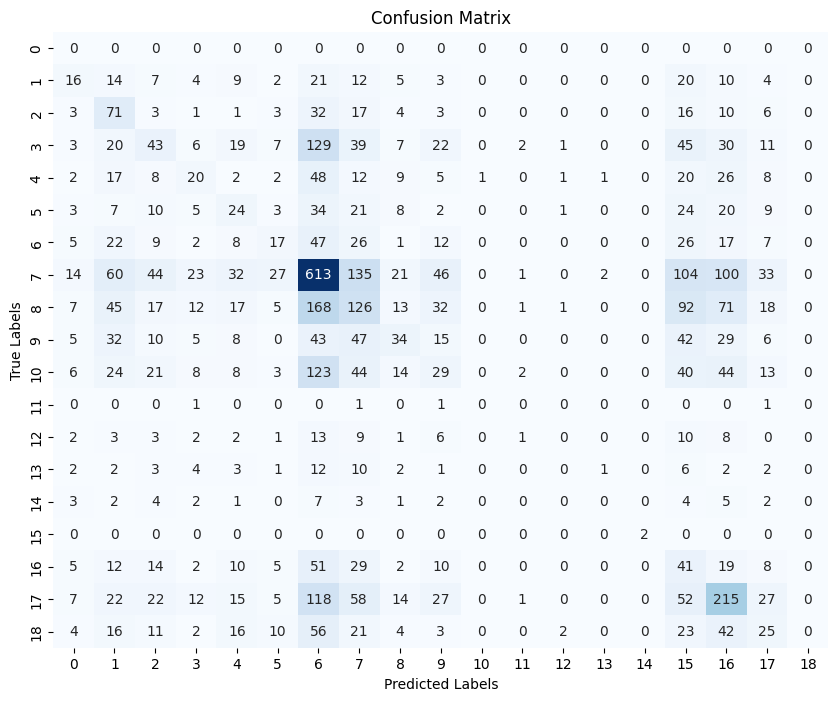

Accuracy for class 0: nan
Accuracy for class 1: 0.11023622047244094
Accuracy for class 2: 0.01764705882352941
Accuracy for class 3: 0.015625
Accuracy for class 4: 0.01098901098901099
Accuracy for class 5: 0.017543859649122806
Accuracy for class 6: 0.23618090452261306
Accuracy for class 7: 0.10756972111553785
Accuracy for class 8: 0.0208
Accuracy for class 9: 0.05434782608695652
Accuracy for class 10: 0.0
Accuracy for class 11: 0.0
Accuracy for class 12: 0.0
Accuracy for class 13: 0.0196078431372549
Accuracy for class 14: 0.0
Accuracy for class 15: 0.0
Accuracy for class 16: 0.09134615384615384
Accuracy for class 17: 0.0453781512605042
Accuracy for class 18: 0.0


In [ ]:
y_pred_probs = model.predict(X_test_padded)
y_pred_labels = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

total_samples_per_class = conf_matrix.sum(axis=1)
correct_predictions_per_class = np.diag(conf_matrix)
accuracy_per_class = correct_predictions_per_class / total_samples_per_class

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
y_pred_probs = model.predict(X_test_padded)
np.argmax(y_pred_probs)
#y_pred_labels = (y_pred_probs, axis=1)

157/157 [==============================] - 2s 11ms/step


448

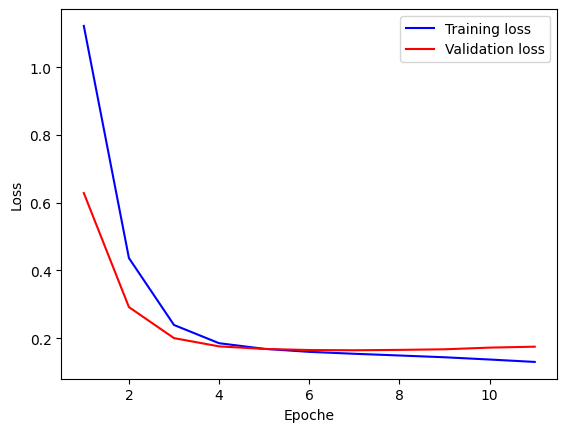

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Numero di epoche
epochs = range(1, len(train_loss) + 1)

# Tracciamo la perdita sui dati di addestramento e sui dati di validazione
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend()
plt.show()

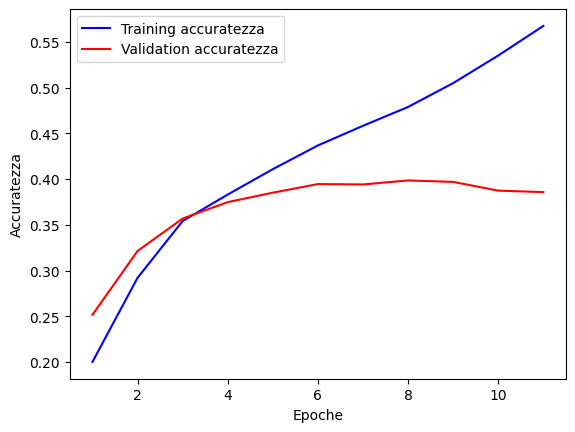

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Numero di epoche
epochs = range(1, len(train_accuracy) + 1)

# Tracciamo l'accuratezza sui dati di addestramento e sui dati di validazione
plt.plot(epochs, train_accuracy, 'b', label='Training accuratezza')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuratezza')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.show()

#kfold

In [ ]:
# Tokenization
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_cleaned['extracted_text'])

features = tokenizer.texts_to_sequences(df_cleaned['extracted_text'])

vocab_size = len(tokenizer.word_index) + 1


In [ ]:
# Padding
from keras.preprocessing.sequence import pad_sequences

maxlen = 150

features_pad = pad_sequences(features, padding='post', maxlen=maxlen)



25320

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


encoder = LabelEncoder()
labels = encoder.fit_transform(df_cleaned['category_num'])


In [ ]:
from keras.backend import clear_session
from keras import regularizers

clear_session()

l2_reg=regularizers.L2(0.001)
embedding_dim = 300

def create_net():
    net = Sequential()
    net.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
    net.add(LSTM(128, return_sequences=True))
    net.add(BatchNormalization())
    net.add(layers.Flatten())
    net.add(layers.Dense(512, activation='relu'))
    net.add(Dropout(0.3))
    net.add(layers.Dense(256, activation='relu'))
    net.add(layers.Dense(84, activation='relu',kernel_regularizer=l2_reg))
    net.add(layers.Dense(18, activation='softmax'))

    net.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


    return net




In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store cross-validation accuracies and validation losses
acc = []
val_losses = []

# Define cross-validation split
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=0.001)

# Perform cross-validation
f = 1
for train_index, test_index in skf.split(df_cleaned['extracted_text'], df_cleaned['ICD9_CATEGORY']):
    print("Fold", f)
    x_train = features_pad[train_index]
    y_train = labels[train_index]
    x_test = features_pad[test_index]
    y_test = labels[test_index]

    # Convert labels to categorical format
    y_train_cat = to_categorical(y_train)

    # Build and compile the model
    model = create_net()  # Use your network creation function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model on the training fold with early stopping
    history = model.fit(x_train, y_train_cat, batch_size=256, epochs=100, verbose=1,
                        validation_data=(x_test, to_categorical(y_test)),
                        callbacks=[early_stopping])

    # Record validation loss from the final epoch
    val_losses.append(history.history['val_loss'][-1])

    # Increment fold counter
    f += 1


Fold 1
Epoch 1/100
89/89 [==============================] - 25s 196ms/step - loss: 2.2510 - accuracy: 0.3520 - val_loss: 2.7386 - val_accuracy: 0.2997
Epoch 2/100
89/89 [==============================] - 12s 135ms/step - loss: 1.8300 - accuracy: 0.4636 - val_loss: 2.7066 - val_accuracy: 0.3216
Epoch 3/100
89/89 [==============================] - 10s 117ms/step - loss: 1.5070 - accuracy: 0.5505 - val_loss: 2.5889 - val_accuracy: 0.3057
Epoch 4/100
89/89 [==============================] - 7s 81ms/step - loss: 1.2123 - accuracy: 0.6380 - val_loss: 2.3696 - val_accuracy: 0.3296
Epoch 5/100
89/89 [==============================] - 7s 78ms/step - loss: 0.9910 - accuracy: 0.7031 - val_loss: 2.1684 - val_accuracy: 0.3436
Epoch 6/100
89/89 [==============================] - 7s 74ms/step - loss: 0.8411 - accuracy: 0.7461 - val_loss: 2.7485 - val_accuracy: 0.3264
Epoch 7/100
89/89 [==============================] - 5s 62ms/step - loss: 0.7349 - accuracy: 0.7762 - val_loss: 3.2199 - val_accuracy: 

79/79 [==============================] - 2s 9ms/step
Accuracy: 0.3157894736842105
Mean accuracy 0.3157894736842105


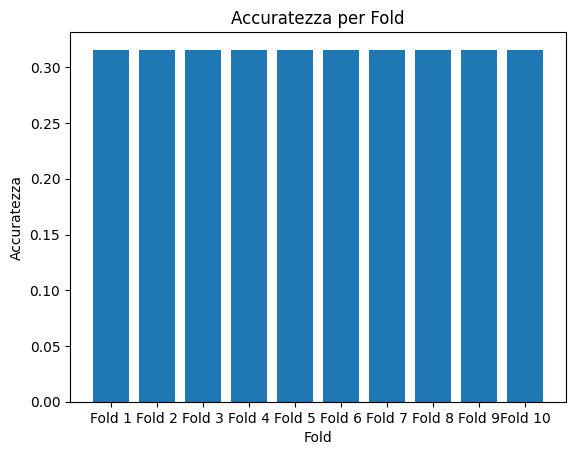

In [ ]:
probs=model.predict(x_test)
y_test_pred=np.argmax(probs,axis=-1)
a=accuracy_score(y_test,y_test_pred)
acc.append(a)
print("Accuracy:",a)
f=f+1

avg_acc = sum(acc) / len(acc)
print("Mean accuracy", avg_acc)
folds = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Fold 6", "Fold 7", "Fold 8", "Fold 9", "Fold 10"]

plt.figure()
plt.title("Accuratezza per Fold")
plt.bar(folds, acc)
plt.xlabel("Fold")
plt.ylabel("Accuratezza")
plt.show()
